In [1]:
import sys
assert sys.version_info >= (3,5)



import sklearn
assert sklearn.__version__ >= "0.20"


import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from pylab import rcParams
rcParams['figure.figsize']  = 12,5
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12 


import os



import warnings
warnings.filterwarnings(action ='ignore', message ='^internal gelsd')

In [2]:
train_credit = pd.read_csv('train.csv')
test_credit = pd.read_csv('test.csv')

In [3]:
train_credit.head()


,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [4]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [5]:
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']


test_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [6]:
train_credit.head()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [7]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [8]:
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [9]:
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

C:\Users\atulr\anaconda3\envs\SouthGermanCredit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_risk', ylabel='count'>

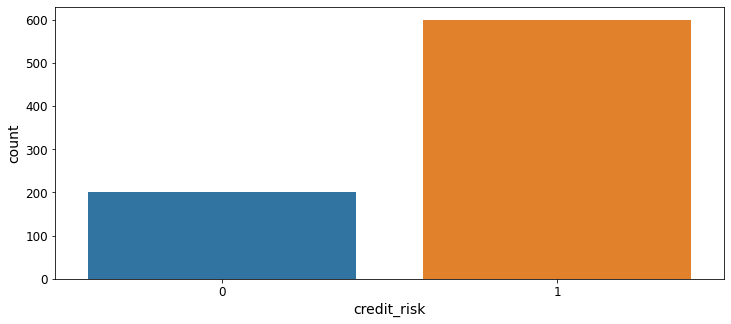

In [10]:
sns.countplot(train_credit['credit_risk'])

C:\Users\atulr\anaconda3\envs\SouthGermanCredit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

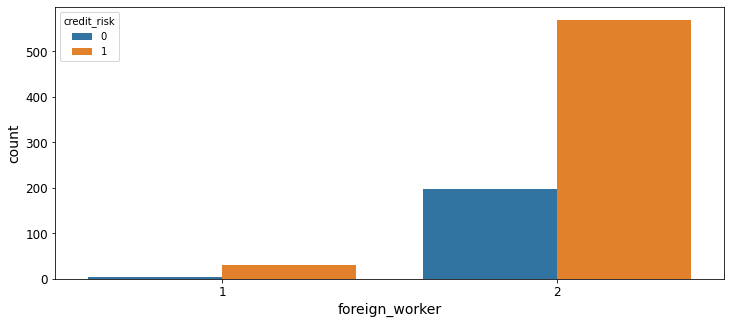

In [11]:
sns.countplot(train_credit['foreign_worker'],hue=train_credit['credit_risk'])

C:\Users\atulr\anaconda3\envs\SouthGermanCredit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_risk', ylabel='count'>

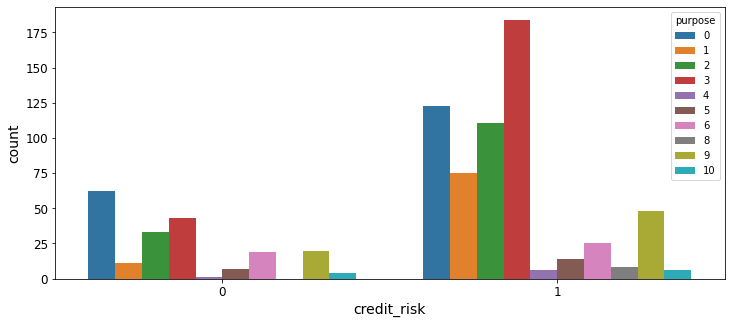

In [12]:
sns.countplot(train_credit['credit_risk'],hue=train_credit['purpose'])

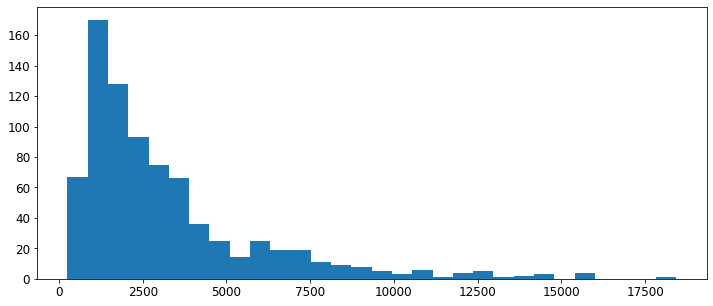

In [13]:
plt.hist(train_credit['amount'],bins = 30);

In [14]:
train_credit[train_credit['credit_risk'] == 0]

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
600,45,1,18,2,0,1216,1,2,4,2,...,3,23,3,1,1,3,2,2,2,0
601,47,4,18,4,6,1864,2,3,4,2,...,1,30,3,2,2,3,2,1,2,0
602,171,1,12,2,0,1228,1,3,4,2,...,1,24,3,2,1,2,2,1,2,0
603,234,2,12,2,0,685,1,4,2,4,...,3,25,1,2,1,2,2,1,2,0
604,304,3,9,2,3,745,1,3,3,2,...,1,28,3,2,1,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,33,1,1,3,3,2,2,2,0
796,994,1,12,0,3,6199,1,3,4,3,...,2,28,3,1,2,3,2,2,2,0
797,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
798,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


Text(0.5, 1.0, 'Bad Loans Amount')

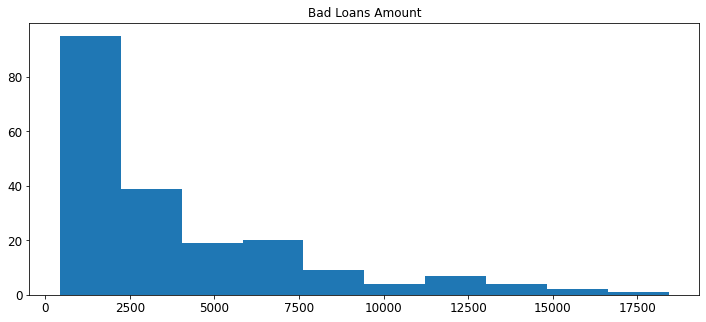

In [15]:
plt.hist(train_credit[train_credit['credit_risk'] == 0]['amount'])
plt.title('Bad Loans Amount')

In [16]:
train_credit['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

In [17]:
df = train_credit.copy()

In [18]:
df.drop(['Id'],inplace = True, axis = 1)

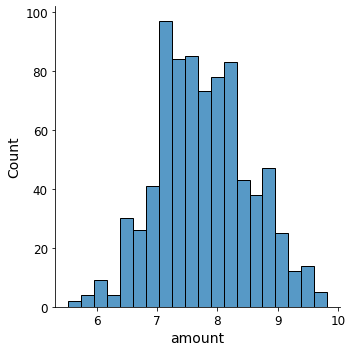

In [19]:
log_amount = np.log(df['amount'])
sns.displot(log_amount, bins = 20)

In [20]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold

In [21]:
new_df = train_credit.copy()


In [22]:
new_df.drop('Id',axis =1, inplace = True)

In [23]:
new_df['log_amount'] = round(np.log(new_df['amount']),2)
new_df['log_age'] = round(np.log(new_df['age']),2)
new_df['log_duration'] = round(np.log(new_df['duration']),2)

In [24]:
new_df.drop(['amount','age','duration'],axis =1, inplace = True)

In [25]:
new_df.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,2,1,2,4,2,1,4,2,...,1,1,3,2,1,2,1,6.96,3.04,2.89
1,1,4,0,1,3,2,3,1,2,1,...,1,2,3,1,1,2,1,7.94,3.58,2.20
2,2,2,9,2,4,2,2,1,4,1,...,1,1,2,2,1,2,1,6.73,3.14,2.48
3,1,4,0,1,3,3,3,1,2,1,...,1,2,2,1,1,1,1,7.66,3.66,2.48
4,1,4,0,1,2,1,3,1,3,1,...,1,2,2,1,1,1,1,7.71,3.87,2.30


In [26]:
X_full = new_df.drop('credit_risk',axis = 1)
y_full = new_df['credit_risk']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [28]:
def cross_validate(X = X_train,y = y_train):
    
    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier(eval_metric = 'logloss')))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    
    
    
    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [29]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7828125,Std Dev: 0.02974227403181091
Model:GB,Mean: 0.7822916666666667,Std Dev: 0.04287315755678474
Model:SVC,Mean: 0.7572916666666667,Std Dev: 0.016503103664327976
Model:SGD,Mean: 0.6557291666666667,Std Dev: 0.15279957625422994
Model:LogReg,Mean: 0.7703125,Std Dev: 0.04097406128170195
Model:AdaBoost,Mean: 0.7671875,Std Dev: 0.046060634290573985
Model:Bag,Mean: 0.7546875,Std Dev: 0.05958706646230651
Model:xgboost,Mean: 0.7739583333333333,Std Dev: 0.04487637339278753
Model:lightgbm,Mean: 0.7692708333333333,Std Dev: 0.04068171788578856
Model:Dtree,Mean: 0.7161458333333334,Std Dev: 0.04859405702832623


In [30]:
test_sub= test_credit.copy()

In [31]:
test_sub.drop('Id', axis=1, inplace = True)

In [32]:
test_sub['log_amount'] = round(np.log(test_sub['amount']),2)
test_sub['log_age'] =  round(np.log(test_sub['age']),2)
test_sub['log_duration'] = round(np.log(test_sub['duration']),2)

In [33]:
test_sub.drop(['amount', 'age','duration'], axis =1 ,inplace = True)

In [34]:
test_sub.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,log_amount,log_age,log_duration
0,1,4,0,1,3,4,3,1,4,2,1,2,2,2,2,1,1,7.68,3.64,2.48
1,1,2,3,5,4,2,4,1,4,3,3,1,2,2,2,1,2,7.57,3.14,2.89
2,2,4,3,1,5,4,3,1,4,1,3,2,1,3,2,1,2,7.76,3.58,3.58
3,1,4,0,1,3,1,3,1,3,1,3,1,3,3,1,1,2,8.21,3.61,1.79
4,2,2,5,1,2,4,3,1,1,4,3,1,1,2,2,1,2,7.78,3.50,3.58


In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [37]:
ada  = ADASYN(sampling_strategy = 'minority', random_state = 42, n_neighbors = 7)
X_res,y_res = ada.fit_resample(X_train,y_train)

In [38]:
Counter(y_res)

Counter({1: 485, 0: 468})

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8527448830409358,Std Dev: 0.03856927165329371
Model:GB,Mean: 0.8198684210526317,Std Dev: 0.04073050349616102
Model:SVC,Mean: 0.7712865497076022,Std Dev: 0.030194413156052192
Model:SGD,Mean: 0.7052850877192982,Std Dev: 0.07945165854759019
Model:LogReg,Mean: 0.7548391812865495,Std Dev: 0.03780391295263339
Model:AdaBoost,Mean: 0.7611184210526317,Std Dev: 0.0394686542441786
Model:Bag,Mean: 0.8079714912280702,Std Dev: 0.03737960039496665
Model:xgboost,Mean: 0.855529970760234,Std Dev: 0.035584923898591386
Model:lightgbm,Mean: 0.8467799707602339,Std Dev: 0.03307372700854148
Model:Dtree,Mean: 0.7517141812865497,Std Dev: 0.0419555284400185


In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [42]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]

In [43]:
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

[12:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [44]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 30}

In [45]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002432724E240>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002432724E0F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002432724E4A8>},
                   random_state=42, scoring='accuracy')

In [46]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

In [47]:
rf_clf =  RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)

In [48]:
# hyper parameters selcted based on grid search 
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=8,random_state=42,learning_rate=0.3,
                        booster='gbtree')

In [49]:
svc_clf = SVC(random_state=42)   # with default paramters 


In [50]:

gb_clf = GradientBoostingClassifier(random_state=42) # default parameters


In [51]:

bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())


In [52]:

xgb_clf.fit(X_res,y_res)

[12:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
rf_clf.fit(X_res, y_res)

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)

In [54]:
svc_clf.fit(X_res, y_res)

SVC(random_state=42)

In [55]:
gb_clf.fit(X_res, y_res)

GradientBoostingClassifier(random_state=42)

In [56]:
bag_clf.fit(X_res, y_res)

[12:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [57]:
predictions_train_xgb = xgb_clf.predict(X_test)

In [58]:
predictions_train_rf = rf_clf.predict(X_test)
predictions_train_svc = svc_clf.predict(X_test)
predictions_train_gb = gb_clf.predict(X_test)
predictions_train_bag = bag_clf.predict(X_test)


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_train_gb)))

Accuracy XGBoost...0.76875
Accuracy RForest...0.73125
Accuracy SupportVector...0.71875
Accuracy GBoost...0.70625
Accuracy Bagging...0.70625


In [60]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_train_gb)))

Precision XGBoost...0.8305084745762712
Precision RForest...0.8529411764705882
Precision SupportVector...0.8301886792452831
Precision GBoost...0.8090909090909091
Precision Bagging...0.8090909090909091


In [61]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_train_gb)))


Recall XGBoost...0.8521739130434782
Recall RForest...0.7565217391304347
Recall SupportVector...0.7652173913043478
Recall GBoost...0.7739130434782608
Recall Bagging...0.7739130434782608


In [62]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))

XGBoost_Confusion Matrix
[[25 20]
 [17 98]]
RandomForest_Confusion Matrix
[[30 15]
 [28 87]]
SupportVector_Confusion Matrix
[[27 18]
 [27 88]]
GradientBoosting_Confusion Matrix
[[24 21]
 [26 89]]
Bagging_Confusion Matrix
[[24 21]
 [26 89]]


In [63]:
train_oversample = pd.concat([X_res,X_test],axis=0)
test_oversample = pd.concat([y_res,y_test],axis=0)

In [64]:
train_oversample = scalar.fit_transform(train_oversample)

In [65]:
xgb_clf.fit(train_oversample,test_oversample)

[12:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
rf_clf.fit(train_oversample,test_oversample)

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)

In [67]:
svc_clf.fit(train_oversample,test_oversample)

SVC(random_state=42)

In [68]:
gb_clf.fit(train_oversample,test_oversample)

GradientBoostingClassifier(random_state=42)

In [69]:
bag_clf.fit(train_oversample,test_oversample)

[12:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [70]:
predictions_final_xgb = xgb_clf.predict(scalar.transform(test_sub))
predictions_final_rf = rf_clf.predict(scalar.transform(test_sub))
predictions_final_svc = svc_clf.predict(scalar.transform(test_sub))
predictions_final_gb = gb_clf.predict(scalar.transform(test_sub))
predictions_final_bag = bag_clf.predict(scalar.transform(test_sub))

In [71]:
s_xgb = pd.Series(predictions_final_xgb, name='XGB')
s_rf = pd.Series(predictions_final_rf, name='RF')
s_svc = pd.Series(predictions_final_svc, name='SVC')
s_gb = pd.Series(predictions_final_gb, name='GB')
s_bag = pd.Series(predictions_final_bag, name='BAG')
idx = test_credit['Id']

In [72]:
model_pred = pd.concat([idx,s_xgb,s_rf,s_svc,s_gb,s_bag],axis=1)
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG
0,4,1,1,1,1,1
1,14,1,1,1,1,1
2,18,1,1,1,1,1
3,20,1,1,1,1,1
4,22,0,0,0,0,0


In [73]:
model_pred['vote'] = model_pred[['XGB','RF','SVC','GB','BAG']].sum(axis=1)
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG,vote
0,4,1,1,1,1,1,5
1,14,1,1,1,1,1,5
2,18,1,1,1,1,1,5
3,20,1,1,1,1,1,5
4,22,0,0,0,0,0,0


In [74]:
# criteria to select the final credit risk score 
def vote(vote_sum):
    if vote_sum >=2:
        return 1
    else:
        return 0

In [75]:
model_pred['kredit'] = model_pred['vote'].apply(vote)

In [77]:
model_pred.tail()

,Id,XGB,RF,SVC,GB,BAG,vote,kredit
195,982,1,0,1,0,1,3,1
196,984,1,1,1,1,1,5,1
197,988,0,0,0,0,0,0,0
198,995,0,0,0,0,0,0,0
199,996,1,0,0,1,1,3,1


In [78]:
submission = model_pred.drop(['XGB','RF','SVC','GB','BAG','vote'],axis=1)
submission.tail(20)

,Id,kredit
180,947,1
181,949,1
182,950,0
183,953,1
184,957,0
185,958,0
186,960,1
187,963,0
188,965,0
189,968,0


In [79]:

submission.to_csv('AggregatedModel_Predictions.csv',index=False)

In [82]:
import pickle
# open a file, where you ant to store the data
file = open('model_pred.pkl','wb')

# dump information to that file
pickle.dump((xgb_clf,rf_clf,svc_clf,gb_clf,bag_clf), file)